In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

# 1. Read in residual heatmap and client boolean masks

In [2]:
# Heatmap
resid_map = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Masks for clients
clients = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_clients = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_clients = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_clients = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

strong_ihb_clients = strong_clients & ihb_clients
strong_dep_clients = strong_clients & dep_clients

# 2. Read in CA coordinates

In [3]:
cd_cas = np.loadtxt('../../PyMOL/interface_atoms/2src_cd_CA.txt')
sh2_int_cas = np.loadtxt('../../PyMOL/interface_atoms/sh2_interface_ca.txt')
sh3_int_cas = np.loadtxt('../../PyMOL/interface_atoms/sh3_interface_ca.txt')
active_site = np.loadtxt('../../PyMOL/interface_atoms/active_site_ca.txt')
af_pocket = np.loadtxt('../../PyMOL/interface_atoms/alphaF_pocket_ca.txt')
hsp90_int = np.loadtxt('../../PyMOL/interface_atoms/hsp90_homol_interface_ca.txt')
cdc37_int = np.loadtxt('../../PyMOL/interface_atoms/cdc37_homol_interface_ca.txt')

# 3. Calculate minimum CA-interface distances for each position

In [4]:
def get_distance(p1, p2):
    distance = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)
    return(distance)

In [5]:
sh2_distances = []
sh3_distances = []

active_site_distances = []
af_distances = []
hsp90_distances = []
cdc37_distances = []
for pos in cd_cas:
    
    sh2_interface_distances = []
    for atom in sh2_int_cas:
        sh2_interface_distances.append(get_distance(pos, atom))
    min_sh2_dist = min(sh2_interface_distances)
    
    sh3_interface_distances = []
    for atom in sh3_int_cas:
        sh3_interface_distances.append(get_distance(pos, atom))
    min_sh3_dist = min(sh3_interface_distances)
    
    as_int_distances = []
    for atom in active_site:
        as_int_distances.append(get_distance(pos, atom))
    min_as_dist = min(as_int_distances)
    
    af_int_distances = []
    for atom in af_pocket:
        af_int_distances.append(get_distance(pos, atom))
    min_af_dist = min(af_int_distances)
    
    hsp90_int_distances = []
    for atom in hsp90_int:
        hsp90_int_distances.append(get_distance(pos, atom))
    min_hsp90_dist = min(hsp90_int_distances)
    
    cdc37_int_distances = []
    for atom in cdc37_int:
        cdc37_int_distances.append(get_distance(pos, atom))
    min_cdc37_dist = min(cdc37_int_distances)
    
    sh2_distances.append(min_sh2_dist)
    sh3_distances.append(min_sh3_dist)
    active_site_distances.append(min_as_dist)
    af_distances.append(min_af_dist)
    hsp90_distances.append(min_hsp90_dist)
    cdc37_distances.append(min_cdc37_dist)
    
sh2_distances = np.array(sh2_distances)
sh3_distances = np.array(sh3_distances)
active_site_distances = np.array(active_site_distances)
af_distances = np.array(af_distances)
hsp90_distances = np.array(hsp90_distances)
cdc37_distances = np.array(cdc37_distances)

# Writing analysis 

In [12]:
interface_pos = {
    'sh3_interface':[
270, 271, 289, 290, 292,
293, 295, 311, 314, 315,
327, 328, 329, 330, 331,
332, 333, 334, 336, 338,
340, 342, 403
],

    'sh2_interface':[
323, 324, 368, 371, 372,
400, 402, 519, 520
],

    'alphaF_pocket':[
378, 381, 443, 444, 506,
508, 511, 512
],

    'active_site':[
281, 280, 278, 298, 284,
296, 276, 341, 342, 326,
344, 396, 343, 345, 351,
394, 391, 389, 407
],

    'src_hsp90_homology_interface':[
337, 338, 339, 340, 341,
342, 343, 345, 346, 347,
351, 352, 355, 371, 375,
382, 398, 399, 400, 402,
404, 412, 415, 417, 418,
513, 515, 516,
],

    'src_cdc37_homology_interface':[
372, 375, 376, 379, 380,
383, 384, 385, 386, 396,
402, 403, 404, 405, 406,
407, 408, 411, 412, 413,
]}

In [14]:
resid_map[[
372, 375, 376, 379, 380,
383, 384, 385, 386, 396,
402, 403, 404, 405, 406,
407, 408, 411, 412, 413,
]]

KeyError: "None of [Int64Index([372, 375, 376, 379, 380, 383, 384, 385, 386, 396, 402, 403, 404,\n            405, 406, 407, 408, 411, 412, 413],\n           dtype='int64')] are in the [columns]"

In [37]:
list(resid_map.values[(0,3), 0])

[nan, nan]

In [43]:
# Get values for each interface
interface_vals = {}
for interface, positions in interface_pos.items():
    pos_idx = [src_utils.__pos_idx_dict__[pos] for pos in positions if pos in src_utils.__pos_idx_dict__.keys()]
    interface_vals[interface] = resid_map.values[tuple(pos_idx), :]
    
# Make array for plotting with seaborn
interface_names = []
vals = []
for interface, val in interface_vals.items():
    val = val.flatten()
    n = len(val)
    
    vals = vals + list(val)
    interface_names = interface_names + [interface] * n

[Text(0, 0, 'sh3_interface'),
 Text(0, 0, 'sh2_interface'),
 Text(0, 0, 'alphaF_pocket'),
 Text(0, 0, 'active_site'),
 Text(0, 0, 'src_hsp90_homology_interface'),
 Text(0, 0, 'src_cdc37_homology_interface')]

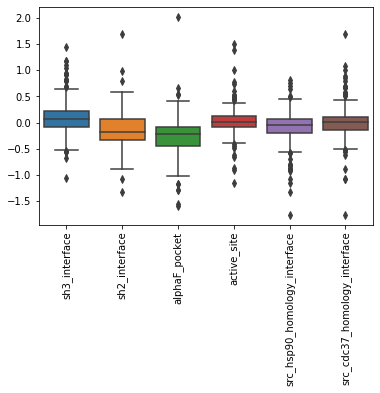

In [54]:
fig = sns.boxplot(interface_names, vals)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

# 4. Analysis by number of clients

In [6]:
# Count clients by position
all_by_pos = np.sum(~np.isnan(resid_map.values), axis=1)

def get_client_number_by_pos(resid_map, client_mask):
    client_by_pos = (resid_map * client_mask)
    client_by_pos[client_by_pos==0.0] = np.nan
    client_by_pos = np.sum(~np.isnan(client_by_pos), axis=1)
    return(client_by_pos)

client_by_pos = get_client_number_by_pos(resid_map.values, clients)
ihb_client_by_pos = get_client_number_by_pos(resid_map.values, ihb_clients)
dep_client_by_pos = get_client_number_by_pos(resid_map.values, dep_clients)
strong_ihb_by_pos = get_client_number_by_pos(resid_map.values, strong_ihb_clients)
strong_dep_by_pos = get_client_number_by_pos(resid_map.values, strong_dep_clients)

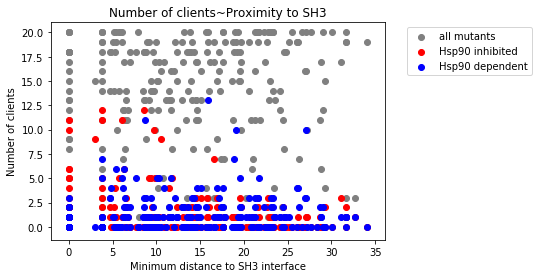

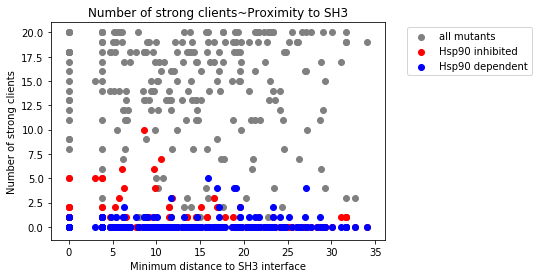

In [7]:
plt.scatter(sh3_distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(sh3_distances, ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh3_distances, dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to SH3')
plt.show()

plt.scatter(sh3_distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(sh3_distances, strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh3_distances, strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to SH3')
plt.show()

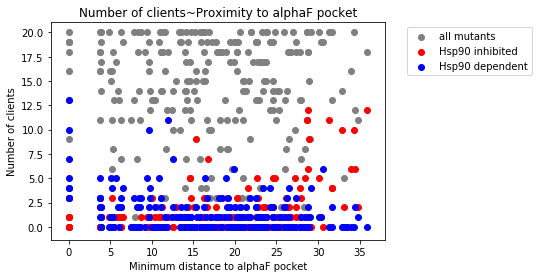

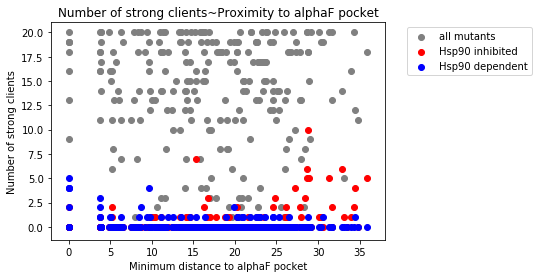

In [8]:
distances = af_distances
distance_name = 'alphaF pocket'

plt.scatter(distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(distances, ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(distances, dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to {}'.format(distance_name))
plt.show()

plt.scatter(distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(distances, strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(distances, strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to {}'.format(distance_name))
plt.show()

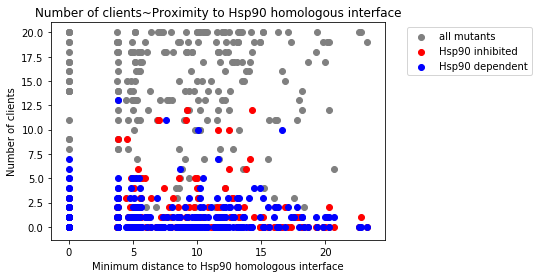

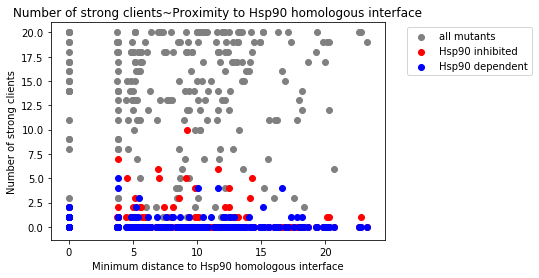

In [9]:
distances = hsp90_distances
distance_name = 'Hsp90 homologous interface'

plt.scatter(distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(distances, ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(distances, dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to {}'.format(distance_name))
plt.show()

plt.scatter(distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(distances, strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(distances, strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to {}'.format(distance_name))
plt.show()

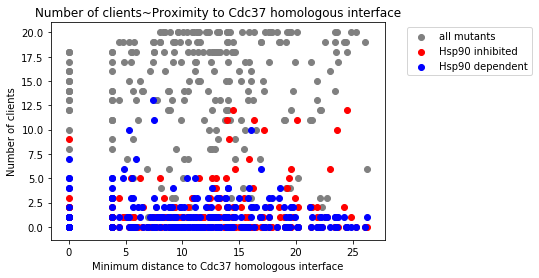

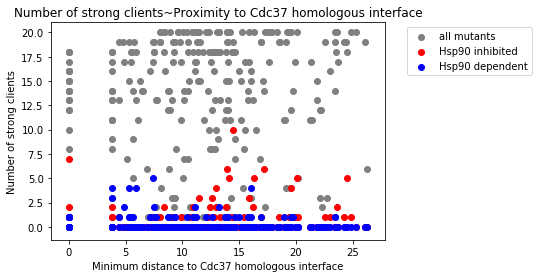

In [10]:
distances = cdc37_distances
distance_name = 'Cdc37 homologous interface'

plt.scatter(distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(distances, ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(distances, dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to {}'.format(distance_name))
plt.show()

plt.scatter(distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(distances, strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(distances, strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to {}'.format(distance_name))
plt.show()

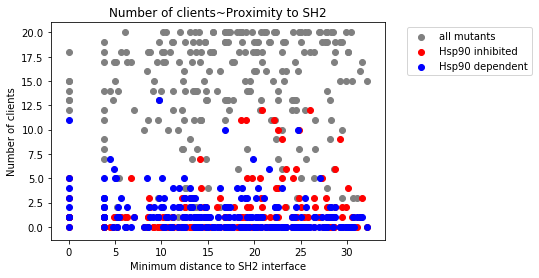

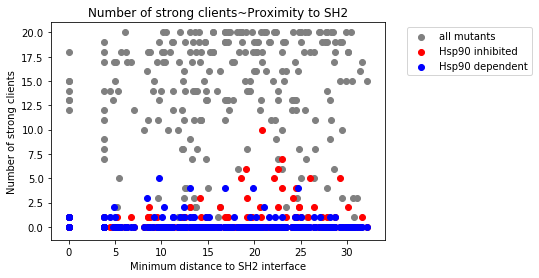

In [11]:
plt.scatter(sh2_distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(sh2_distances, ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh2_distances, dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to SH2')
plt.show()

plt.scatter(sh2_distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(sh2_distances, strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(sh2_distances, strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to SH2')
plt.show()

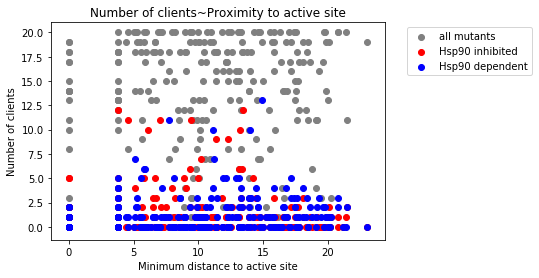

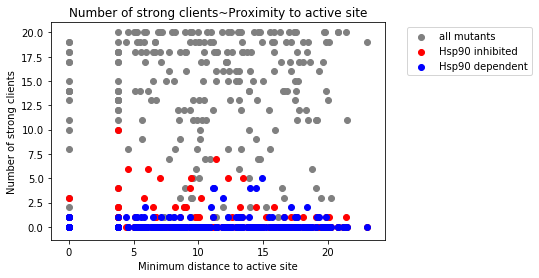

In [12]:
plt.scatter(active_site_distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(active_site_distances, ihb_client_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(active_site_distances, dep_client_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to active site')
plt.ylabel('Number of clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of clients~Proximity to active site')
plt.show()

plt.scatter(active_site_distances, all_by_pos, color='gray', label='all mutants')
plt.scatter(active_site_distances, strong_ihb_by_pos, color='r', label='Hsp90 inhibited')
plt.scatter(active_site_distances, strong_dep_by_pos, color='b', label='Hsp90 dependent')
plt.xlabel('Minimum distance to active site')
plt.ylabel('Number of strong clients')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.title('Number of strong clients~Proximity to active site')
plt.show()

# 5. Analysis by average residual score

In [13]:
# Average residual by position
pos_mean = np.nanmean(resid_map.values, axis=1)
pos_mean_abs = np.nanmean(abs(resid_map.values), axis=1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


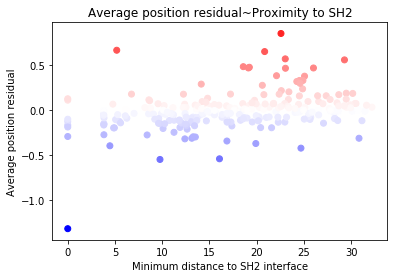

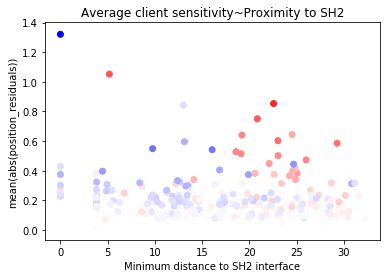

In [14]:
plt.scatter(sh2_distances, pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to SH2')
plt.show()

plt.scatter(sh2_distances, pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH2 interface')
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to SH2')
plt.show()



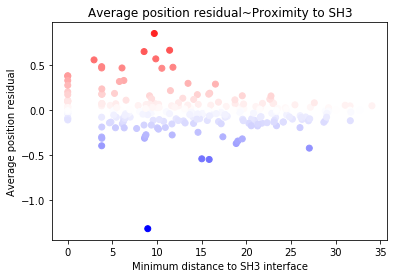

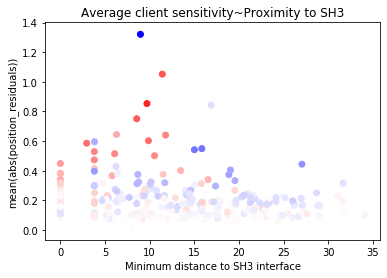

In [15]:
plt.scatter(sh3_distances, pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to SH3')
plt.show()

plt.scatter(sh3_distances, pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to SH3 interface')
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to SH3')
plt.show()

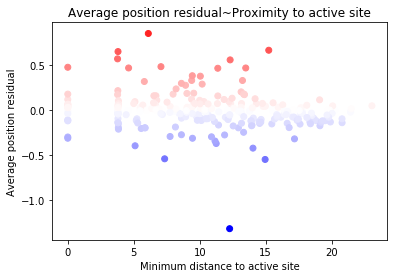

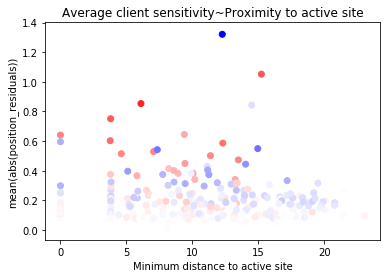

In [16]:
distances = active_site_distances
distance_name = 'active site'

plt.scatter(distances, pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to {}'.format(distance_name))
plt.show()

plt.scatter(distances, pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to {}'.format(distance_name))
plt.show()

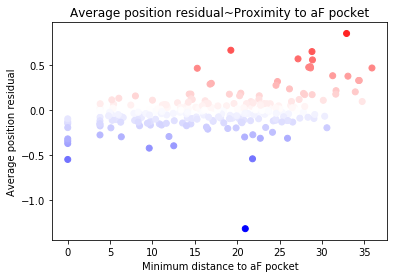

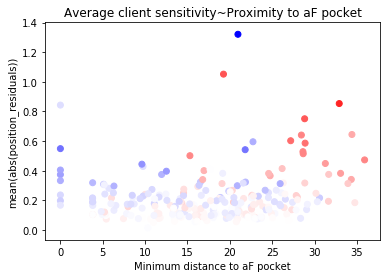

In [17]:
distances = af_distances
distance_name = 'aF pocket'

plt.scatter(distances, pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to {}'.format(distance_name))
plt.show()

plt.scatter(distances, pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to {}'.format(distance_name))
plt.show()

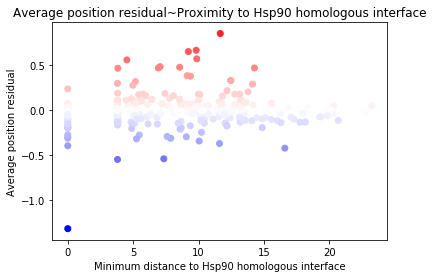

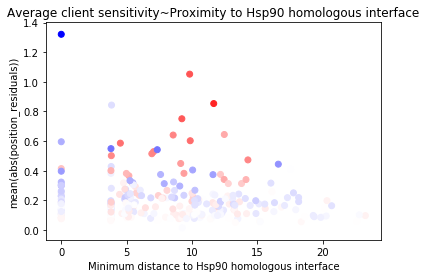

In [18]:
distances = hsp90_distances
distance_name = 'Hsp90 homologous interface'

plt.scatter(distances, pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to {}'.format(distance_name))
plt.show()

plt.scatter(distances, pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to {}'.format(distance_name))
plt.show()

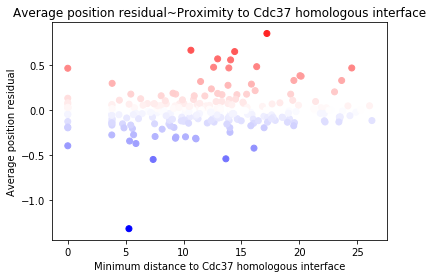

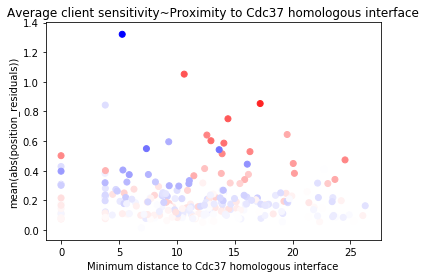

In [19]:
distances = cdc37_distances
distance_name = 'Cdc37 homologous interface'

plt.scatter(distances, pos_mean, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('Average position residual')
plt.title('Average position residual~Proximity to {}'.format(distance_name))
plt.show()

plt.scatter(distances, pos_mean_abs, c=pos_mean, cmap='bwr', vmin=-1, vmax=1)
plt.xlabel('Minimum distance to {}'.format(distance_name))
plt.ylabel('mean(abs(position_residuals))')
plt.title('Average client sensitivity~Proximity to {}'.format(distance_name))
plt.show()

# Collect all distances into a single dataframe

In [59]:
distances_df = pd.DataFrame(
    data=np.array([sh2_distances, sh3_distances, active_site_distances, af_distances]).T,
    index=src_utils.__cd_pos__,
    columns=['sh2_interface', 'sh3_interface', 'active_site', 'aF_pocket']
)

In [60]:
interface_classification = []
for pos in distances_df.index:
    idx = np.argmin(distances_df.loc[pos, :])
    classification = distances_df.columns.tolist()[idx]
    if min(distances_df.loc[pos, :]) > 0.0:
        classification = 'misc'
    interface_classification.append(classification)

distances_df['interface_classification'] = interface_classification

[Text(0, 0, 'sh3_interface'),
 Text(0, 0, 'misc'),
 Text(0, 0, 'active_site'),
 Text(0, 0, 'sh2_interface'),
 Text(0, 0, 'aF_pocket')]

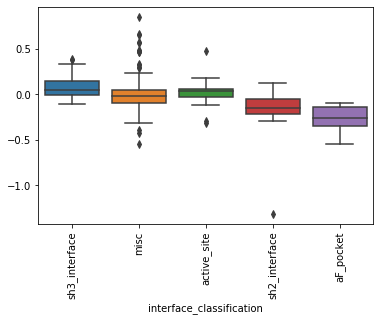

In [61]:
ax = sns.boxplot(distances_df['interface_classification'], pos_mean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'sh3_interface'),
 Text(0, 0, 'misc'),
 Text(0, 0, 'active_site'),
 Text(0, 0, 'sh2_interface'),
 Text(0, 0, 'aF_pocket')]

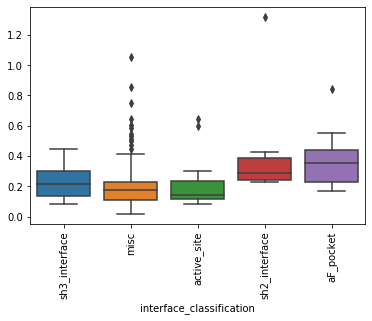

In [62]:
ax = sns.boxplot(distances_df['interface_classification'], pos_mean_abs)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [69]:
chap_distances_df = pd.DataFrame(
    data=np.array([hsp90_distances, cdc37_distances]).T,
    index=src_utils.__cd_pos__,
    columns=['hsp90_interface', 'cdc37_interface']
)

interface_classification = []
for pos in chap_distances_df.index:
    idx = np.argmin(chap_distances_df.loc[pos, :])
    classification = chap_distances_df.columns.tolist()[idx]
    if min(chap_distances_df.loc[pos, :]) > 0.0:
        classification = 'misc'
    if sum(chap_distances_df.loc[pos, :]) == 0.0:
        classification = 'both'
    interface_classification.append(classification)

chap_distances_df['interface_classification'] = interface_classification

[Text(0, 0, 'misc'),
 Text(0, 0, 'hsp90_interface'),
 Text(0, 0, 'cdc37_interface'),
 Text(0, 0, 'both')]

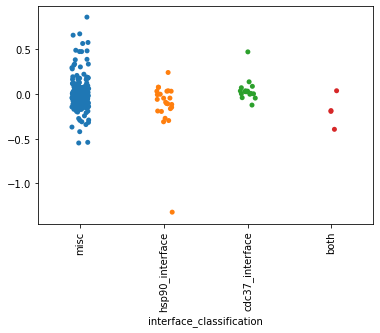

In [74]:
ax = sns.stripplot(chap_distances_df['interface_classification'], pos_mean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'misc'),
 Text(0, 0, 'hsp90_interface'),
 Text(0, 0, 'cdc37_interface'),
 Text(0, 0, 'both')]

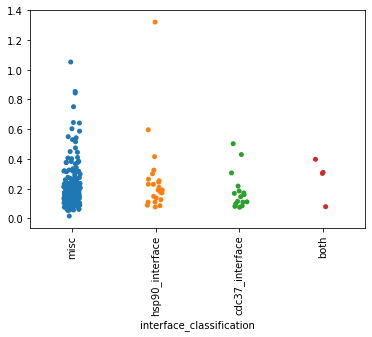

In [73]:
ax = sns.stripplot(chap_distances_df['interface_classification'], pos_mean_abs)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)